<ipython-input-1-3c31a49bbe51>:10: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
<ipython-input-1-3c31a49bbe51>:11: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


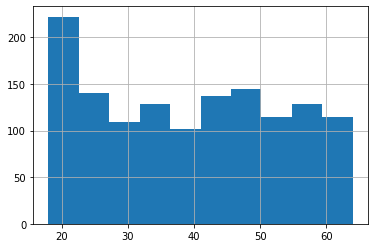

In [1]:
import pandas as pd
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State
import plotly.express as px
import pandas as pd

####
import pandas as pd
import plotly.express as px
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html, State
import dash
import dash_bootstrap_components as dbc
from dash import Input, Output, dcc, html
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
import dash
import dash_bootstrap_components as dbc
import pandas as pd
import plotly.graph_objs as go
from dash import Input, Output, dcc, html
from sklearn import datasets
from sklearn.cluster import KMeans
df=pd.read_csv('insurance.csv')
ord_enc = OrdinalEncoder()
df["sex"] = ord_enc.fit_transform(df[["sex"]])
df["region"] = ord_enc.fit_transform(df[["region"]])
df["smoker"] = ord_enc.fit_transform(df[["smoker"]])
reg = LinearRegression().fit(df.iloc[:,:-1].values, df['expenses'].values)
reg.predict(np.array([[3,5,3,4,5,7]]) )
df.head(3)
###
df2=pd.read_csv('insurance.csv')
df2.head(3)
df2.shape
df2.dtypes
df2.age.hist()
df2.describe()
df2.region.unique()
fig1=px.scatter(df, x='bmi',y='expenses',color='smoker',size='age',size_max=20,hover_name='region'
           ,title='ABMI VS Expenses',trendline='ols' , width=600, height=400)
fig2=px.scatter(df, x='age',y='bmi',size_max=20,hover_name='region',color='sex'
           ,title='Age VS BMI',trendline='ols', width=600, height=400 )
d=df.groupby(['children']).mean()['expenses'].reset_index()
fig3=px.bar(d , x='children' ,y='expenses' ,title='Children Number VS Totoal Expenses' )
fig4=px.box(df, x='children',y='expenses',hover_name='region',color='sex'
           ,title='Children Number VS Expenses Distribution')
fig5=px.box(df, x='sex',y='age',hover_name='region',color='smoker'
           ,title='Age Distribution for different genders')

In [2]:
str(round(df.bmi.mean(),1))+'Average BMI'

'30.7Average BMI'

In [3]:


card_content1 = [
   
    dbc.CardBody(
        [
            html.H2(str(round(df.expenses.mean()/1000,1))+'K'),  
            html.H4 ( 'Average Expenses', className="card-title"),
           
        ]
    ),
]

card_content2 = [
   
    dbc.CardBody(
        [
            html.H2(str(round(df.bmi.mean(),1))) ,
            html.H4( 'Average BMI', className="card-title"),
           
        ]
    ),
]

card_content3 = [
   
    dbc.CardBody(
        [
            html.H2(str(round(df.smoker.mean()*100))+'%') ,
            html.H4( 'smoking percentage ', className="card-title"),
           
        ]
    ),
]

page1 = html.Div(
    [
        dbc.Row(
            [
                dbc.Col(dbc.Card(card_content1, color="primary", inverse=True)),
                dbc.Col(
                    dbc.Card(card_content2, color="secondary", inverse=True)
                ),
                dbc.Col(dbc.Card(card_content3, color="info", inverse=True)),
            ],
            className="mb-4",
        ),
        dbc.Row(
            [
                dbc.Col(   dcc.Graph(figure=fig1) ,className='seven columns' ),
                
                dbc.Col(  dcc.Graph(figure=fig2) ,className='seven columns'    ),
            ],
            className="mb-4",
        ),
        dbc.Row(
            [
               dbc.Col(   dcc.Graph(figure=fig3) ,className='four columns' ),
                
                dbc.Col(  dcc.Graph(figure=fig4) ,className='four columns'    ),
                 dbc.Col(  dcc.Graph(figure=fig5) ,className='four columns'    ),
            ]
        ),
    ]
)


###################################################page2########################################


iris_raw = datasets.load_iris()
iris = pd.DataFrame(iris_raw["data"], columns=iris_raw["feature_names"])


but=html.Div(
    [
        dbc.Button(
            "Predict ",
            id="fade-transition-button",
            className="mb-3",
            n_clicks=0,
        ),
        dbc.Fade(
            dbc.Card(
                dbc.CardBody(
                   html.Div( 'predicting ... ',id='ii'),
                )
            ),
            id="fade-transition",
            is_in=True,
            style={"transition": "opacity 2000ms ease"},
            timeout=2000,
        ),
    ]
)

controls1 = dbc.Card(
    [
        html.Div(
            [
                dbc.Label("Gender "),
                dcc.Dropdown(
                    id="x-variable",
                    options=[
                        {"label": "male" , "value": "1" } ,{"label": "female" , "value": "0" } 
                    ],
                    value="male",
                ),
            ]
        ),
        html.Div(
            [
                dbc.Label("Region "),
                dcc.Dropdown(
                    id="y-variable",
                    options=[
                     {"label": "southwest" , "value": "3" } ,{"label": "southeast" , "value": "2" },{"label": "northwest" , "value": "1" } ,{"label": "northeast" , "value": "0" } 
                    ],
                    value="southwest",
                ),
            ]
        ),
        html.Div(
            [
                dbc.Label("Age "),
                dbc.Input(id="age", type="number", value=40),
            ]
        ),
        
         html.Div(
            [
                dbc.Label("BMI "),
                dbc.Input(id="bmi", type="number", value=30),
            ]
        ),
        
        html.Div(
            [
                dbc.Label("Chilren "),
                dbc.Input(id="children", type="number", value=4),
            ]
        ),
        
           html.Div(
            [
                dbc.Label("Smoker "),
                dcc.Dropdown(
                    id="smoker",
                    options=[
                     {"label": "smoker" , "value": "1" } ,{"label": "nonsmoker" , "value": "0" } 
                    ],
                    value="smoker",
                ),
            ]
        ),
        
     
        
    
        
    ],
    body=True,
)




page2 = dbc.Container(
    [
        html.H1("Predicting health expenses ..."),
        html.Hr(),
        dbc.Row(
            [
                dbc.Col(controls1, md=4),
                dbc.Col(html.Div(dcc.Graph(id='myPredict')), md=8),
                #dbc.Col(dcc.Graph(figure = px.histogram(df, x="expenses")), md=8),
                #dbc.Col(controls2, md=5),
            ],
            align="center",
        ),
        
        
        
        dbc.Row(
            but
        ),
        
    ],
    fluid=True,
)

In [ ]:
import dash
import dash_bootstrap_components as dbc
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output, State

app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

navbar = dbc.NavbarSimple(
    children=[
        dbc.Button("Sidebar", outline=True, color="secondary", className="mr-1", id="btn_sidebar"),
        dbc.NavItem(dbc.NavLink(" Visualization ", href="#")),
        #dbc.DropdownMenu(
        #    children=[
        #        dbc.DropdownMenuItem("More pages", header=True),
        #        dbc.DropdownMenuItem("Page 2", href="#"),
        #        dbc.DropdownMenuItem("Page 3", href="#"),
        #    ],
        #    nav=True,
        #    in_navbar=True,
        #    label="More",
        #),
    ],
    brand="Health Assurance Data",
    brand_href="#",
    color="dark",
    dark=True,
    fluid=True,
)


# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 62.5,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "height": "100%",
    "z-index": 1,
    "overflow-x": "hidden",
    "transition": "all 0.5s",
    "padding": "0.5rem 1rem",
    "background-color": "#f8f9fa",
}

SIDEBAR_HIDEN = {
    "position": "fixed",
    "top": 62.5,
    "left": "-16rem",
    "bottom": 0,
    "width": "16rem",
    "height": "100%",
    "z-index": 1,
    "overflow-x": "hidden",
    "transition": "all 0.5s",
    "padding": "0rem 0rem",
    "background-color": "#f8f9fa",
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "transition": "margin-left .5s",
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

CONTENT_STYLE1 = {
    "transition": "margin-left .5s",
    "margin-left": "2rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P(
            "A simple sidebar layout with navigation links", className="lead"
        ),
        dbc.Nav(
            [
                dbc.NavLink("Visualization ", href="/page-1", id="page-1-link"),
                dbc.NavLink("Model Prediction", href="/page-2", id="page-2-link"),
               # dbc.NavLink("Page 3", href="/page-3", id="page-3-link"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    id="sidebar",
    style=SIDEBAR_STYLE,
)

content = html.Div(

    id="page-content",
    style=CONTENT_STYLE)

app.layout = html.Div(
    [
        dcc.Store(id='side_click'),
        dcc.Location(id="url"),
        navbar,
        sidebar,
        content,
    ],
)


@app.callback(
    [
        Output("sidebar", "style"),
        Output("page-content", "style"),
        Output("side_click", "data"),
    ],

    [Input("btn_sidebar", "n_clicks")],
    [
        State("side_click", "data"),
    ]
)
def toggle_sidebar(n, nclick):
    if n:
        if nclick == "SHOW":
            sidebar_style = SIDEBAR_HIDEN
            content_style = CONTENT_STYLE1
            cur_nclick = "HIDDEN"
        else:
            sidebar_style = SIDEBAR_STYLE
            content_style = CONTENT_STYLE
            cur_nclick = "SHOW"
    else:
        sidebar_style = SIDEBAR_STYLE
        content_style = CONTENT_STYLE
        cur_nclick = 'SHOW'

    return sidebar_style, content_style, cur_nclick

# this callback uses the current pathname to set the active state of the
# corresponding nav link to true, allowing users to tell see page they are on
@app.callback(
    [Output(f"page-{i}-link", "active") for i in range(1, 4)],
    [Input("url", "pathname")],
)
def toggle_active_links(pathname):
    if pathname == "/":
        # Treat page 1 as the homepage / index
        return True, False, False
    return [pathname == f"/page-{i}" for i in range(1, 4)]


@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
    if pathname in ["/", "/page-1"]:
        return page1
    elif pathname == "/page-2":
        return page2
    elif pathname == "/page-3":
        return html.P("Oh cool, this is page 3!")
    # If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )


################################page2######################
@app.callback(
    Output(component_id='myPredict',component_property='figure'),
    Output("fade-transition", "is_in"),
    Output("ii", "children"),
    [Input("fade-transition-button", "n_clicks")],
     [Input("age", "value")],
     [Input("bmi", "value")],
     [Input("children", "value")],
    [State("fade-transition", "is_in")],
)
def toggle_fade(n,a,b,c, is_in):
    if not n:
        # Button has never been clicked
        return True
    res=reg.predict(np.array([[float(a),2,float(b),float(c),5,7]]) )
    print(res)
    figure = px.histogram(df, x="expenses")
    figure.add_vline(x=res[0]-100000, line_width=3, line_dash="dash", line_color="black")
    
    return  figure,not is_in , "the resut : "+ str(round(res[0]/1000) )+ ' K'



if __name__ == "__main__":
    app.run_server()


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [28/Apr/2022 13:58:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Apr/2022 13:58:56] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [28/Apr/2022 14:04:39] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:12:51] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:12:53] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:12:54] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.

Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\user\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\user\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_data(fun

127.0.0.1 - - [28/Apr/2022 14:12:54] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [28/Apr/2022 14:12:55] "POST /_dash-update-component HTTP/1.1" 200 -


[126730.39892733]


127.0.0.1 - - [28/Apr/2022 14:13:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:13:29] "POST /_dash-update-component HTTP/1.1" 200 -


[126987.67140951]


127.0.0.1 - - [28/Apr/2022 14:13:29] "POST /_dash-update-component HTTP/1.1" 200 -


[127244.94389168]
[127502.21637386]
[127759.48885603]


127.0.0.1 - - [28/Apr/2022 14:13:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:13:30] "POST /_dash-update-component HTTP/1.1" 200 -


[128016.76133821]
[128274.03382038]


127.0.0.1 - - [28/Apr/2022 14:13:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:13:30] "POST /_dash-update-component HTTP/1.1" 200 -


[128531.30630256]


127.0.0.1 - - [28/Apr/2022 14:13:31] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:13:35] "POST /_dash-update-component HTTP/1.1" 200 -


[128198.66148406]
[127866.01666555]


127.0.0.1 - - [28/Apr/2022 14:13:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:13:35] "POST /_dash-update-component HTTP/1.1" 200 -


[127533.37184705]


127.0.0.1 - - [28/Apr/2022 14:13:35] "POST /_dash-update-component HTTP/1.1" 200 -


[127200.72702854]
[126868.08221004]


127.0.0.1 - - [28/Apr/2022 14:13:35] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:14:30] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:14:32] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:14:36] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:39:17] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:39:19] "POST /_dash-update-component HTTP/1.1" 200 -


Exception on /_dash-update-component [POST]
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\user\anaconda3\lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1950, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\user\anaconda3\lib\site-packages\flask\app.py", line 1936, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "C:\Users\user\anaconda3\lib\site-packages\dash\dash.py", line 1345, in dispatch
    response.set_data(fun

127.0.0.1 - - [28/Apr/2022 14:39:19] "POST /_dash-update-component HTTP/1.1" 500 -
127.0.0.1 - - [28/Apr/2022 14:39:22] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:39:39] "POST /_dash-update-component HTTP/1.1" 200 -


[126730.39892733]


127.0.0.1 - - [28/Apr/2022 14:39:49] "POST /_dash-update-component HTTP/1.1" 200 -


[126730.39892733]


127.0.0.1 - - [28/Apr/2022 14:39:54] "POST /_dash-update-component HTTP/1.1" 200 -


[126473.12644515]


127.0.0.1 - - [28/Apr/2022 14:39:55] "POST /_dash-update-component HTTP/1.1" 200 -


[126215.85396298]
[125958.5814808]

127.0.0.1 - - [28/Apr/2022 14:39:55] "POST /_dash-update-component HTTP/1.1" 200 -



[125701.30899863]


127.0.0.1 - - [28/Apr/2022 14:39:55] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:39:57] "POST /_dash-update-component HTTP/1.1" 200 -


[126033.95381713]


127.0.0.1 - - [28/Apr/2022 14:39:58] "POST /_dash-update-component HTTP/1.1" 200 -


[126366.59863563]
[126699.24345414]


127.0.0.1 - - [28/Apr/2022 14:39:58] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:39:58] "POST /_dash-update-component HTTP/1.1" 200 -


[127031.88827264]


127.0.0.1 - - [28/Apr/2022 14:39:59] "POST /_dash-update-component HTTP/1.1" 200 -


[127364.53309115]


127.0.0.1 - - [28/Apr/2022 14:40:11] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:40:14] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [28/Apr/2022 14:40:21] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
accordion = html.Div(
    dbc.Accordion(
        [
            dbc.AccordionItem(
                [
                    html.P("This is the content of the first section"),
                    dbc.Button("Click here"),
                ],
                title="Item 1",
            ),
            dbc.AccordionItem(
                [
                    html.P("This is the content of the second section"),
                    dbc.Button("Don't click me!", color="danger"),
                ],
                title="Item 2",
            ),
            dbc.AccordionItem(
                "This is the content of the third section",
                title="Item 3",
            ),
        ],
    )
)

In [ ]:
card_content = [
    dbc.CardHeader("Card header"),
    dbc.CardBody(
        [
            html.H5("Card title", className="card-title"),
            html.P(
                "This is some card content that we'll reuse",
                className="card-text",
            ),
        ]
    ),
]

cards = html.Div(
    [
        dbc.Row(
            [
                dbc.Col(dbc.Card(card_content, color="primary", inverse=True)),
                dbc.Col(
                    dbc.Card(card_content, color="secondary", inverse=True)
                ),
                dbc.Col(dbc.Card(card_content, color="info", inverse=True)),
            ],
            className="mb-4",
        ),
        dbc.Row(
            [
                dbc.Col(   dcc.Graph(figure=fig1) ,className='five columns' ),
                
                dbc.Col(  dcc.Graph(figure=fig2) ,className='five columns'    ),
            ],
            className="mb-4",
        ),
        dbc.Row(
            [
                dbc.Col(dbc.Card(card_content, color="light")),
                dbc.Col(dbc.Card(card_content, color="dark", inverse=True)),
            ]
        ),
    ]
)

In [ ]:
"""
This app creates a simple sidebar layout using inline style arguments and the
dbc.Nav component.

dcc.Location is used to track the current location, and a callback uses the
current location to render the appropriate page content. The active prop of
each NavLink is set automatically according to the current pathname. To use
this feature you must install dash-bootstrap-components >= 0.11.0.

For more details on building multi-page Dash applications, check out the Dash
documentation: https://dash.plot.ly/urls
"""


app = dash.Dash(external_stylesheets=[dbc.themes.BOOTSTRAP])

# the style arguments for the sidebar. We use position:fixed and a fixed width
SIDEBAR_STYLE = {
    "position": "fixed",
    "top": 0,
    "left": 0,
    "bottom": 0,
    "width": "16rem",
    "padding": "2rem 1rem",
    "background-color": "#f8f9fa",
}

# the styles for the main content position it to the right of the sidebar and
# add some padding.
CONTENT_STYLE = {
    "margin-left": "18rem",
    "margin-right": "2rem",
    "padding": "2rem 1rem",
}

sidebar = html.Div(
    [
        html.H2("Sidebar", className="display-4"),
        html.Hr(),
        html.P(
            "A simple sidebar layout with navigation links", className="lead"
        ),
        dbc.Nav(
            [
                dbc.NavLink("Home", href="/", active="exact"),
                dbc.NavLink("Page 1", href="/page-1", active="exact"),
                dbc.NavLink("Page 2", href="/page-2", active="exact"),
            ],
            vertical=True,
            pills=True,
        ),
    ],
    style=SIDEBAR_STYLE,
)

content = html.Div(id="page-content", style=CONTENT_STYLE)

app.layout = html.Div([dcc.Location(id="url"), sidebar, content])


@app.callback(Output("page-content", "children"), [Input("url", "pathname")])
def render_page_content(pathname):
    if pathname == "/":
        return html.P("This is the content of the home page!")
    elif pathname == "/page-1":
        return cards 
    elif pathname == "/page-2":
        return html.P("Oh cool, this is page 2!")
    # If the user tries to reach a different page, return a 404 message
    return dbc.Jumbotron(
        [
            html.H1("404: Not found", className="text-danger"),
            html.Hr(),
            html.P(f"The pathname {pathname} was not recognised..."),
        ]
    )


if __name__ == "__main__":
    app.run_server()